In [7]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
df = pd.read_pickle('/home/youlyu2/model_explore/2a_wtext_wbart.pkl')

In [5]:
df

,author,msg,timestamp,contentText,concern_bart-phillipine,concern_bart-china,concern_bart-united states,concern_bart-refugees,concern_bart-defense,concern_bart-economy,concern_bart-economic sactions,concern_bart-energy
0,1757901,1757903,1672534632,@UnkleFlip @TSingletonSays @SportsVix O shit…d...,0.031723,0.000889,0.061526,0.011795,0.084146,0.209006,0.244000,0.256953
1,1757926,1757927,1672534518,"@GrantCardone Oops, my finger hit CDC it shoul...",0.008754,0.000213,0.006890,0.000416,0.006842,0.063662,0.405183,0.000345
2,1757943,1757945,1672534447,RT @timand2037 RT. #Türkiye has agreed to full...,0.121434,0.001188,0.004340,0.013564,0.485215,0.098772,0.024835,0.058622
3,1757972,1757974,1672533731,RT @ItsDanSheehan You say NPC like it's a bad ...,0.061782,0.000837,0.044490,0.003430,0.283441,0.265223,0.211866,0.042541
4,1758002,1758004,1672533679,"RT @libbyliberalnyc ""(Shittin' On) The Dock of...",0.010799,0.000186,0.005134,0.007702,0.238561,0.012402,0.021285,0.002201
...,...,...,...,...,...,...,...,...,...,...,...,...
4726142,2911227,8420640,1687984124,RT @WalterDixon2 Just saw NSW MP Matt Kean on ...,0.125146,0.017529,0.029939,0.000899,0.233882,0.024213,0.025405,0.134082
4726143,1893498,8420641,1687893683,RT @RobertKennedyJr Dr. Peter Hotez was deeply...,0.096156,0.632033,0.003614,0.000585,0.111489,0.013177,0.004109,0.257104
4726144,6482629,8420642,1687918743,RT @PinoyAkoBlog Pakitag yung sea man nagpalak...,0.089372,0.013020,0.000477,0.050871,0.480595,0.006288,0.032107,0.001587
4726145,1895109,8420643,1687984619,RT @OccupyDemocrats BREAKING: President Biden ...,0.017751,0.021617,0.006680,0.000550,0.014464,0.001005,0.001540,0.180586


/home/youlyu2/model_explore/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/youlyu2/model_explore/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/youlyu2/model_explore/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/youlyu2/model_explore/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The defa

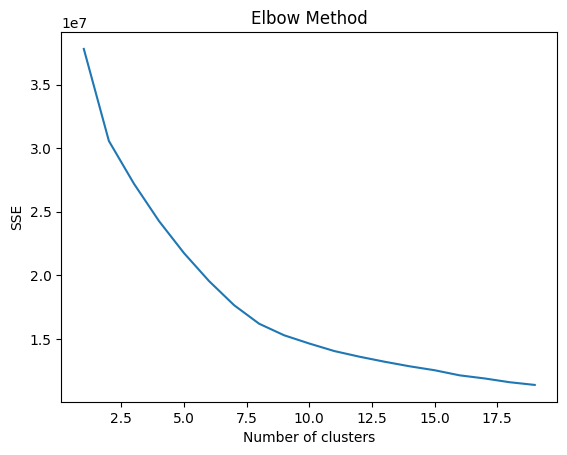

In [9]:


# Example data
X = df[df.columns.difference(['author', 'msg', 'timestamp', 'contentText'])]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 20):  # Adjust the range of k as needed
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the results to find the elbow
import matplotlib.pyplot as plt

plt.plot(range(1, 20), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [10]:
# Fit K-means with the chosen number of clusters (let's say 3 for this example)
k = 8  # Replace with the chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Get cluster labels
labels = kmeans.labels_

/home/youlyu2/model_explore/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
df['Cluster'] = labels

In [13]:
df

,author,msg,timestamp,contentText,concern_bart-phillipine,concern_bart-china,concern_bart-united states,concern_bart-refugees,concern_bart-defense,concern_bart-economy,concern_bart-economic sactions,concern_bart-energy,Cluster
0,1757901,1757903,1672534632,@UnkleFlip @TSingletonSays @SportsVix O shit…d...,0.031723,0.000889,0.061526,0.011795,0.084146,0.209006,0.244000,0.256953,0
1,1757926,1757927,1672534518,"@GrantCardone Oops, my finger hit CDC it shoul...",0.008754,0.000213,0.006890,0.000416,0.006842,0.063662,0.405183,0.000345,0
2,1757943,1757945,1672534447,RT @timand2037 RT. #Türkiye has agreed to full...,0.121434,0.001188,0.004340,0.013564,0.485215,0.098772,0.024835,0.058622,2
3,1757972,1757974,1672533731,RT @ItsDanSheehan You say NPC like it's a bad ...,0.061782,0.000837,0.044490,0.003430,0.283441,0.265223,0.211866,0.042541,0
4,1758002,1758004,1672533679,"RT @libbyliberalnyc ""(Shittin' On) The Dock of...",0.010799,0.000186,0.005134,0.007702,0.238561,0.012402,0.021285,0.002201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4726142,2911227,8420640,1687984124,RT @WalterDixon2 Just saw NSW MP Matt Kean on ...,0.125146,0.017529,0.029939,0.000899,0.233882,0.024213,0.025405,0.134082,0
4726143,1893498,8420641,1687893683,RT @RobertKennedyJr Dr. Peter Hotez was deeply...,0.096156,0.632033,0.003614,0.000585,0.111489,0.013177,0.004109,0.257104,3
4726144,6482629,8420642,1687918743,RT @PinoyAkoBlog Pakitag yung sea man nagpalak...,0.089372,0.013020,0.000477,0.050871,0.480595,0.006288,0.032107,0.001587,2
4726145,1895109,8420643,1687984619,RT @OccupyDemocrats BREAKING: President Biden ...,0.017751,0.021617,0.006680,0.000550,0.014464,0.001005,0.001540,0.180586,0
